# Wine Quality Classifier

<p><b>Status: <span style=color:green;>Completed</span></b></p>

##### LOAD THE DATA

In [1]:
import pandas as pd
import numpy as np

target = 'quality'

features = ['Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

columns = [target] + features

X = pd.read_csv('../../data/wine.data', names=columns, sep=',', header=None)
X.head()

,quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### DATA STANDARIZATION AND VISUALIZATION OF FEATURES VS TARGET

C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


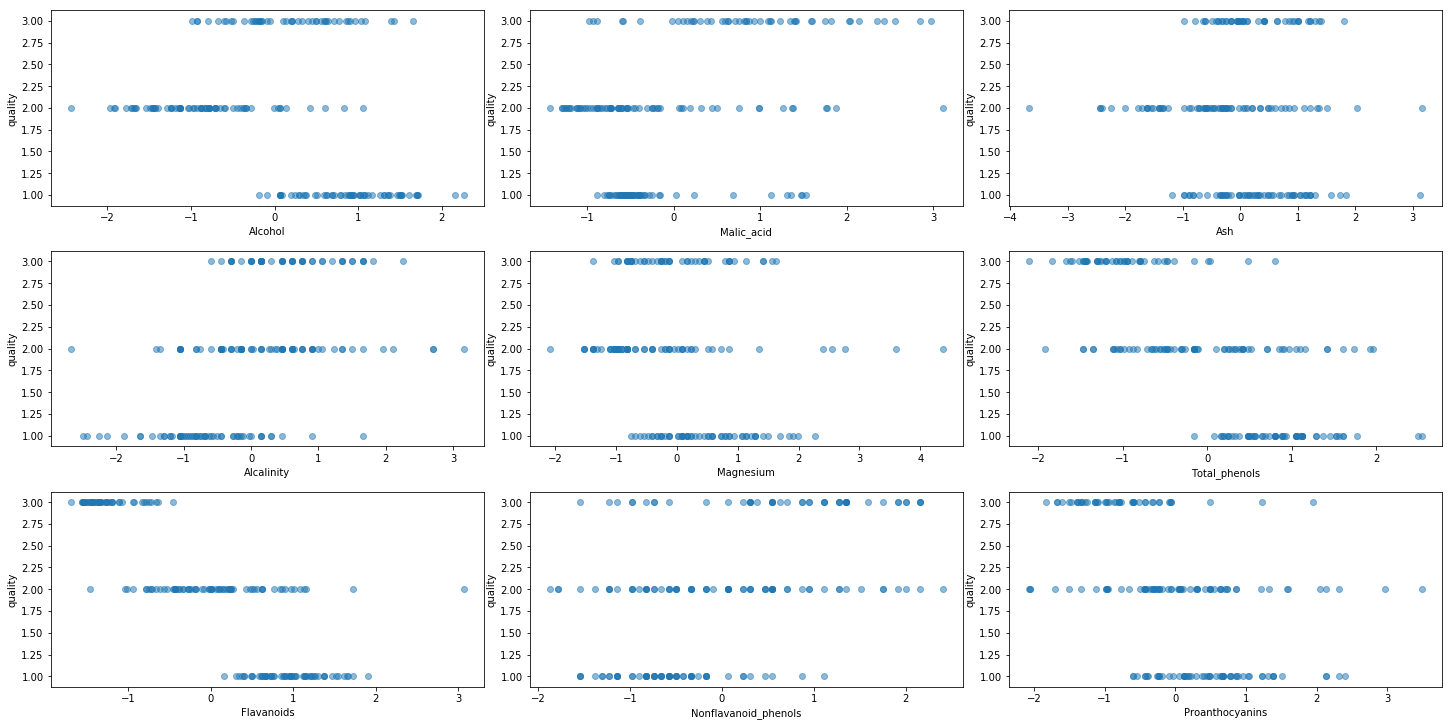

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# separate feature and target values
y = X['quality'].copy()
X = X.drop(columns=['quality'])


# apply standarization to the feature values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

In [3]:
X.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,3.492836e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


##### TRANSFORM THE TARGET VALUES TO ONE-HOT ENCODING

In [4]:
y = pd.get_dummies(y)
y.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


##### SPLIT THE DATA

In [5]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=13)

print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(X_train.shape,
                                                                    y_train.shape,
                                                                    X_test.shape,
                                                                    y_test.shape))

Data shapes:

X_train : (142, 13)
y_train : (142, 3)

X_test : (36, 13)
y_test : (36, 3)


##### DEFINE NETWORK PARAMETERS

In [6]:
# define number of attributes
n_features = X_train.shape[1]    
n_classes = y_train.shape[1]

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 11 neurons in input layer
n_layer_h1 = 50          # first   hidden layer
n_layer_h2 = 50          # second  hidden layer
n_layer_out = n_classes  # 7 neurons in input layer

sigma_init = 0.01   # For randomized initialization

##### MODEL ARCHITECTURE

In [7]:
import tensorflow as tf

# create symbolic variables
X = tf.placeholder(tf.float32, [None, n_features], name="input")
Y = tf.placeholder(tf.float32, [None, n_classes], name="output")

# deploy the variables that will store the weights
W = {
    'W1': tf.Variable(tf.random_normal([n_layer_in, n_layer_h1], stddev = sigma_init), name='W1'),
    'W2': tf.Variable(tf.random_normal([n_layer_h1, n_layer_h2], stddev = sigma_init), name='W2'),
    'W3': tf.Variable(tf.random_normal([n_layer_h2, n_layer_out], stddev = sigma_init), name='W3'),
}

# deploy the variables that will store the bias
b = {
    'b1': tf.Variable(tf.random_normal([n_layer_h1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([n_layer_h2]), name='b2'),
    'b3': tf.Variable(tf.random_normal([n_layer_out]), name='b3'),
}

# this will create the model architecture
def model_MLP(_X, _W, _b):
    with tf.name_scope('hidden_1'):
        layer_h1 = tf.nn.relu(tf.add(tf.matmul(_X,_W['W1']), _b['b1']))
    with tf.name_scope('hidden_2'):
        layer_h2 = tf.nn.relu(tf.add(tf.matmul(layer_h1,_W['W2']), _b['b2']))
    with tf.name_scope('layer_output'):
        layer_out = tf.nn.softmax(tf.add(tf.matmul(layer_h2,_W['W3']), _b['b3']))
        return layer_out
    
with tf.name_scope("MLP"):
    y_pred = model_MLP(X, W, b)

##### DEFINE MODEL CONFIGURATION

In [8]:
learning_rate = 0.6

with tf.name_scope("loss"):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=y_pred)
    loss = tf.reduce_mean(loss, name='MSE')
    
with tf.name_scope("train"):
    optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

##### EXECUTE THE MODEL

In [9]:
# define some parameters
n_epochs = 150
display_epoch = 10
batch_size = 10
n_batches = int(n_train/batch_size)

# store results through every epoch iteration
acc_train_list = []
acc_test_list = []
avg_loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(1, n_epochs+1):
        avg_loss = 0    # store batches' average loss
        
        for i in range(0, n_train, batch_size):
            # create batches
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            
            # start model training
            sess.run(training_op, feed_dict={X:X_batch, Y:y_batch})
            
            
            # Run optimization (backprop), cost and summary nodes
            _, _loss = sess.run([training_op, loss],
                                          feed_dict={X:X_batch, Y:y_batch})
            avg_loss += _loss/n_batches
            
        # after the epoch is finished this will append the loss
        avg_loss_list.append(avg_loss)
            
        # measure performance and display the results
        if (epoch+1) % display_epoch == 0:
            _acc_train = accuracy.eval({X: X_train, Y:y_train})
            _acc_test = accuracy.eval(feed_dict={X: X_test, Y: y_test})
            
            # append results to lists
            acc_train_list.append(_acc_train)
            acc_test_list.append(_acc_test)
            
            print("Epoch: {:04}\tTrainAcc: {:06.5f}\tTestAcc: {:06.5f}\tLoss: {:06.5f}".format((epoch+1),
                                                                                               _acc_train,
                                                                                               _acc_test,
                                                                                               avg_loss))
            

Epoch: 0010	TrainAcc: 0.66197	TestAcc: 0.63889	Loss: 0.75605
Epoch: 0020	TrainAcc: 0.90845	TestAcc: 0.86111	Loss: 0.68356
Epoch: 0030	TrainAcc: 0.99296	TestAcc: 0.97222	Loss: 0.62581
Epoch: 0040	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.61494
Epoch: 0050	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.61105
Epoch: 0060	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60924
Epoch: 0070	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60832
Epoch: 0080	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60781
Epoch: 0090	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60752
Epoch: 0100	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60735
Epoch: 0110	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60724
Epoch: 0120	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60717
Epoch: 0130	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60713
Epoch: 0140	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60710
Epoch: 0150	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60707


##### VISUALIZE THE RESULTS

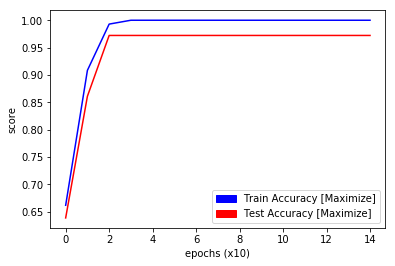

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
red_patch = mpatches.Patch(color='red', label='Test Accuracy [Maximize]')
plt.legend(handles=[blue_patch,red_patch])

#plot the data
plt.plot(acc_train_list, color='blue')
plt.plot(acc_test_list, color='red')

plt.xlabel('epochs (x{})'.format(display_epoch))
plt.ylabel('score');